<img src='logo.png' alt='logo' width=200 align='center' />

<h1 align='center'> The Sparks Foundation </h1>

<h2 align='center'> Data Science and Business Analytics. </h2>

<h2 align='center'> Task: 02 </h2>

<h3 align='center'> Predict the percentage of an student based on the no. of study hours </h3>

<h4 align='center'> The purpose is predicted score if a student studies for 9.25 hrs/day using the given <b> student_scores </b> dataset. </h4>

<h2 align='center'> By: Srinivasan Nandhakumar </h2>

## Step 1: Import Libraries
First, we need to import the necessary libraries for data manipulation, visualization, and modeling.

In [1]:
import pandas as pd                 # For data manipulation and analysis
import numpy as np                  # For numerical operations
import matplotlib.pyplot as plt     # For plotting graphs
import seaborn as sns               # For plotting graphs
from sklearn.model_selection import train_test_split   # For splitting data into training and testing sets
from sklearn.linear_model import LinearRegression      # For building and training the linear regression model
from sklearn import metrics         # For evaluating model performance metrics

## Step 2: Load and Explore the Data

In [2]:
# Load the dataset
data = pd.read_csv("student_scores.csv")

# Display the first few rows of the dataset
print(data.head())


   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [4]:
# Checking for the null values.
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
# Descriptive analysis of the Dataset.
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
# Checking correlation 
correlation = data.corr()
correlation

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


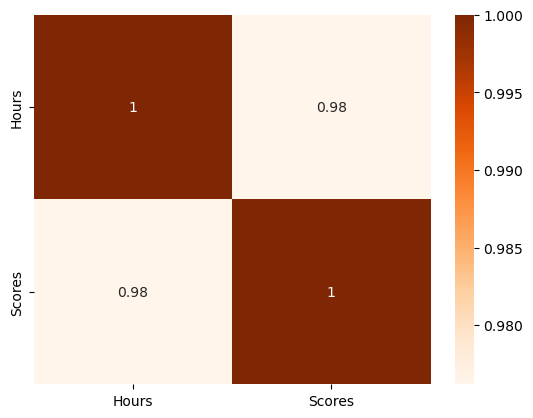

In [7]:
sns.heatmap(correlation,xticklabels =correlation.columns, yticklabels = correlation.columns, annot = True, cmap = 'Oranges')
plt.show()

## Step 3: Visualize the Data

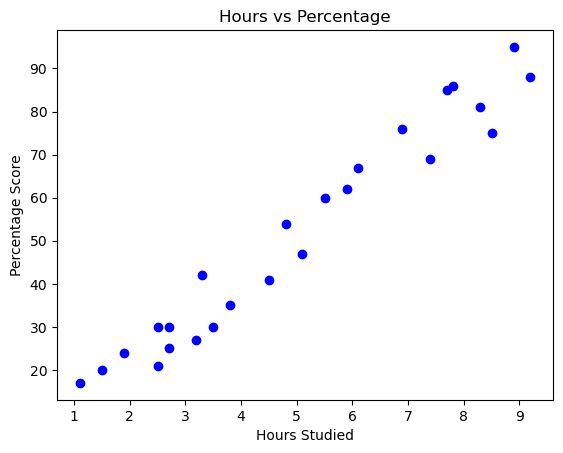

In [8]:
# Plotting the distribution of scores
plt.scatter(data['Hours'], data['Scores'], color='blue')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()


## Step 4: Prepare the Data

In [9]:
# Assigning the input variable (X) and the output variable (y)
X = data.iloc[:, :-1].values   # Features/inputs (hours studied)
y = data.iloc[:, 1].values     # Output/target (percentage score)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


## Step 5: Train the Model

In [10]:
# Creating a linear regression object
regressor = LinearRegression()

# Fitting the model using the training data
regressor.fit(X_train, y_train)


LinearRegression()

## Step 6: Make Predictions

In [11]:
# Predicting scores using the test data
y_pred = regressor.predict(X_test)


## Step 7: Evaluate the Model

In [12]:
# Evaluating the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


## Step 8: Predicting for a New Input

In [13]:
# Predicting score for 9.25 hours/day
hours = 9.25
predicted_score = regressor.predict([[hours]])

print(f'Predicted score if a student studies for {hours} hours/day: {predicted_score[0]}')


Predicted score if a student studies for 9.25 hours/day: 93.69173248737538
